In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Housing.csv')

In [3]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [4]:
for col in binary_cols:
  df[col]=df[col].map({'yes':1,'no':0})

In [5]:
df=pd.get_dummies(df,columns=['furnishingstatus'], drop_first=True)

In [6]:
x=df.drop('price',axis=1)
y=df['price']

In [8]:
df['price'].head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [9]:
# 4. Standardize numerical features (you can skip binary/one-hot columns)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [10]:
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False


In [11]:
print(X_scaled)

[[ 1.04672629  1.40341936  1.42181174 ...  1.80494113 -0.84488844
  -0.6964292 ]
 [ 1.75700953  1.40341936  5.40580863 ... -0.55403469 -0.84488844
  -0.6964292 ]
 [ 2.21823241  0.04727831  1.42181174 ...  1.80494113  1.18358821
  -0.6964292 ]
 ...
 [-0.70592066 -1.30886273 -0.57018671 ... -0.55403469 -0.84488844
   1.43589615]
 [-1.03338891  0.04727831 -0.57018671 ... -0.55403469 -0.84488844
  -0.6964292 ]
 [-0.5998394   0.04727831 -0.57018671 ... -0.55403469 -0.84488844
   1.43589615]]


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.35, random_state=42
)

In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)  # train the model on training data

LinearRegression()

In [36]:
y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 1199905.6128958021
R² Score: 0.6722279290744302


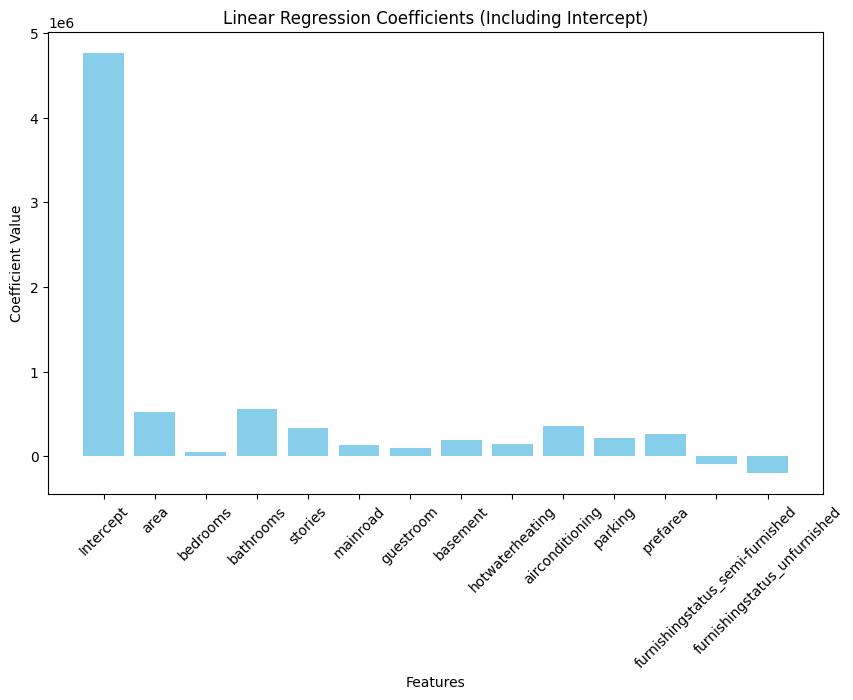

In [17]:
# Get coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Create labels: features + 'Intercept'
labels = list(x.columns)  # feature names
labels.insert(0, 'Intercept')

# Combine intercept and coefficients for plotting
values = np.insert(coefficients, 0, intercept)

# Plot
plt.figure(figsize=(10,6))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Linear Regression Coefficients (Including Intercept)')
plt.xticks(rotation=45)
plt.show()

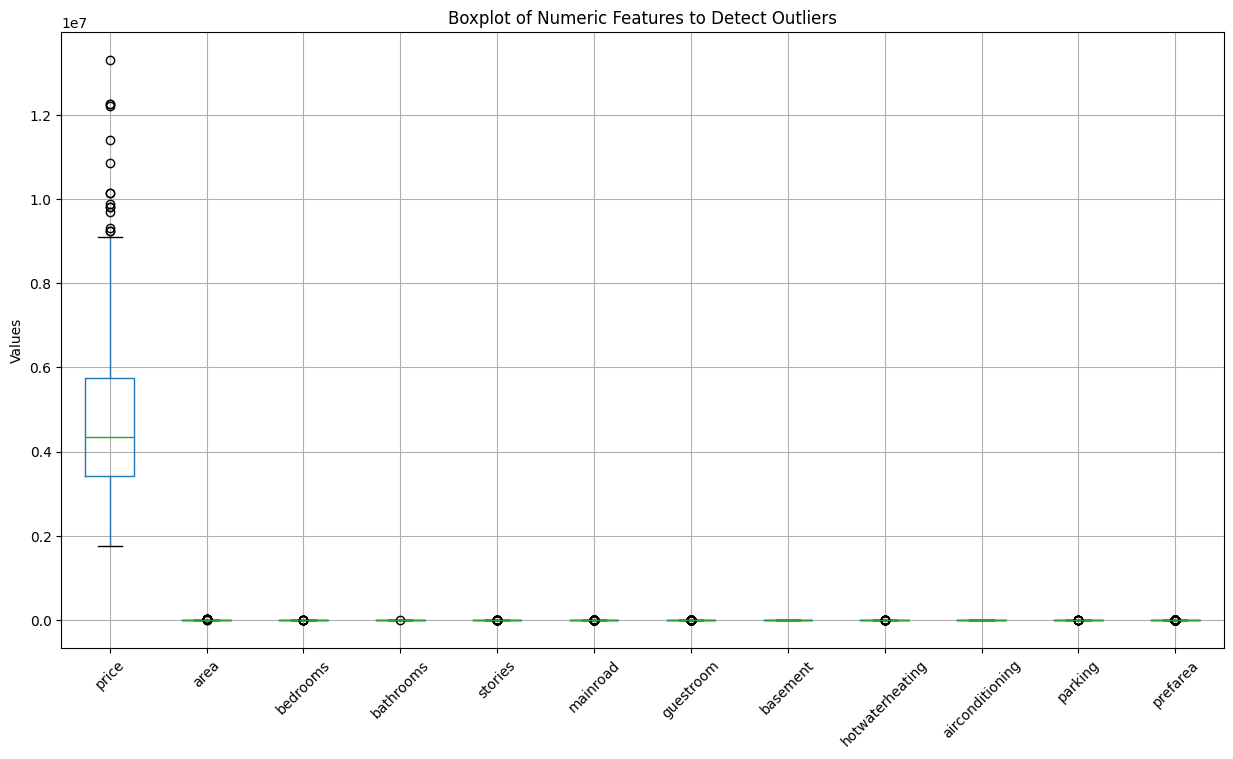

In [38]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 8))
df[numeric_cols].boxplot(rot=45)
plt.title('Boxplot of Numeric Features to Detect Outliers')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

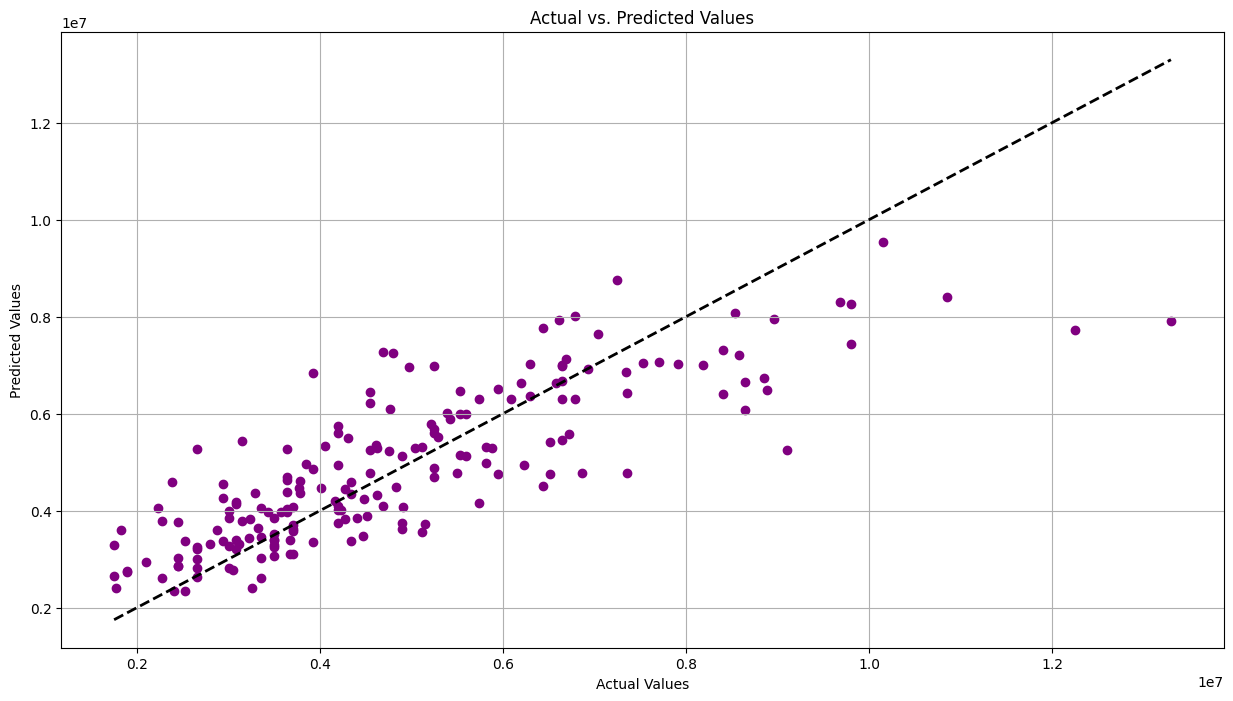

In [39]:
plt.figure(figsize=(15, 8))
plt.scatter(y_test, y_pred, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()